In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
stops = set(stopwords.words('english'))
df = pd.read_csv('../Data/DataLaba8/spam.csv',
                 encoding='windows-1252').iloc[:, :2]
df.columns = ['spam', 'message']
equivalations_is_spam = pd.factorize(df['spam'])
df['spam'] = equivalations_is_spam[0]
df


,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [3]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['message'])
tfidf_vectorizer.vocabulary_


{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

In [4]:
tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
n_samples = 2000
n_features = 1000
n_topics = 2
n_top_words = 20


In [6]:
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(np.array(tfidf.todense()))


In [7]:
res = lda.transform(np.array(tfidf.todense()))
res.shape


(5572, 2)

In [8]:
res

array([[0.88906804, 0.11093196],
       [0.83582472, 0.16417528],
       [0.19071079, 0.80928921],
       ...,
       [0.86415316, 0.13584684],
       [0.89961759, 0.10038241],
       [0.67267575, 0.32732425]])

In [15]:
res[:, 1].shape, res.shape


((5572,), (5572, 2))

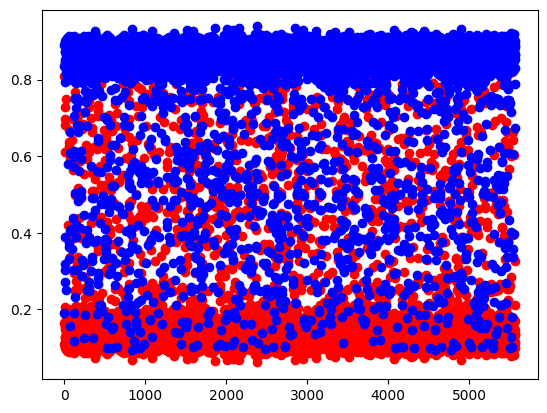

In [19]:
plt.plot(np.arange(res.shape[0]), res[:, 1], 'ro')
plt.plot(np.arange(res.shape[0]), res[:, 0], 'bo')


In [34]:
c = np.array([0 if i > 0.1 else 1 if i < -0.1 else 2 for i in res[:, 0] - res[:, 1]])

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(tfidf.todense()), df['spam'])


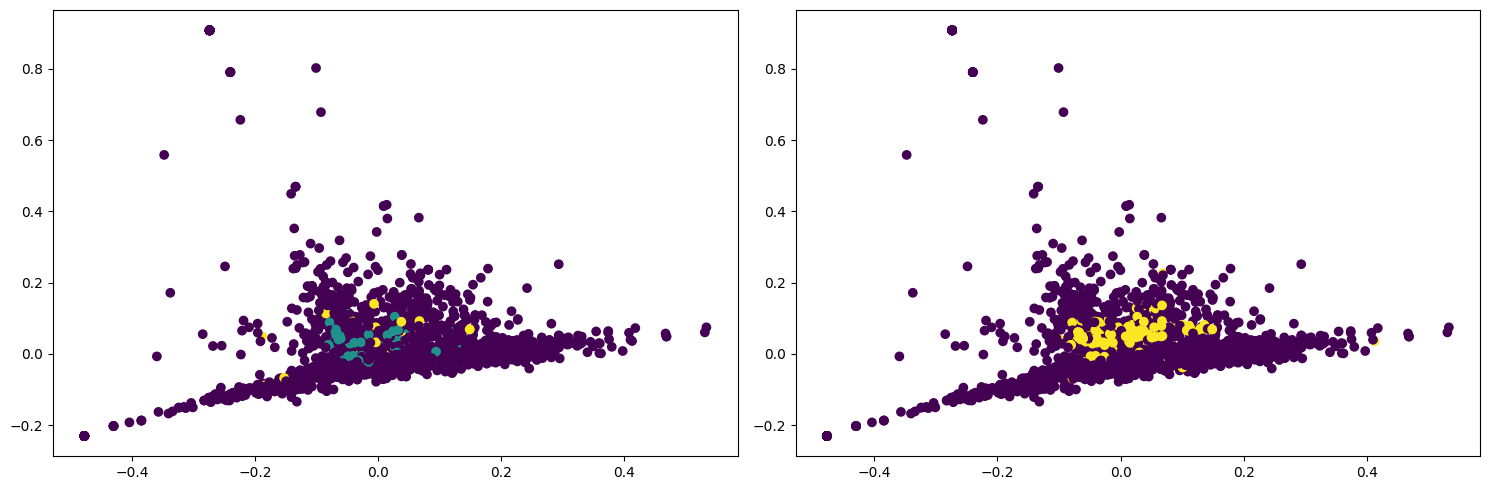

In [36]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=c)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df['spam'].to_numpy())


In [38]:
pca = PCA(n_components=3)
x3 = pca.fit_transform(np.array(tfidf.todense()), df['spam'])


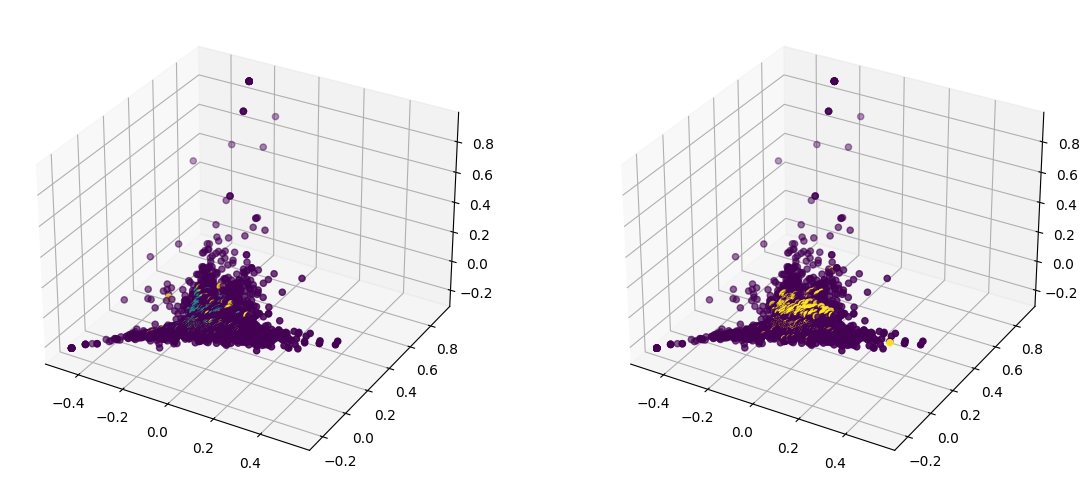

In [40]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=c)
ax = fig.add_subplot(gs[0, 1], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=df['spam'].to_numpy())


In [41]:
lda = LatentDirichletAllocation(n_components=3, max_iter=20,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(np.array(tfidf.todense()))


In [42]:
res = lda.transform(np.array(tfidf.todense()))
res.shape


(5572, 3)

In [43]:
res

array([[0.86407265, 0.06815681, 0.06777054],
       [0.7885806 , 0.10587451, 0.10554489],
       [0.07145011, 0.06167137, 0.86687851],
       ...,
       [0.82751304, 0.08642645, 0.08606051],
       [0.87596124, 0.06346146, 0.0605773 ],
       [0.60438184, 0.28681717, 0.10880099]])

In [44]:
c = np.array([np.argmax(i) for i in res[:, 0] - res[:, 1]])

In [48]:
c

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(tfidf.todense()), df['spam'])


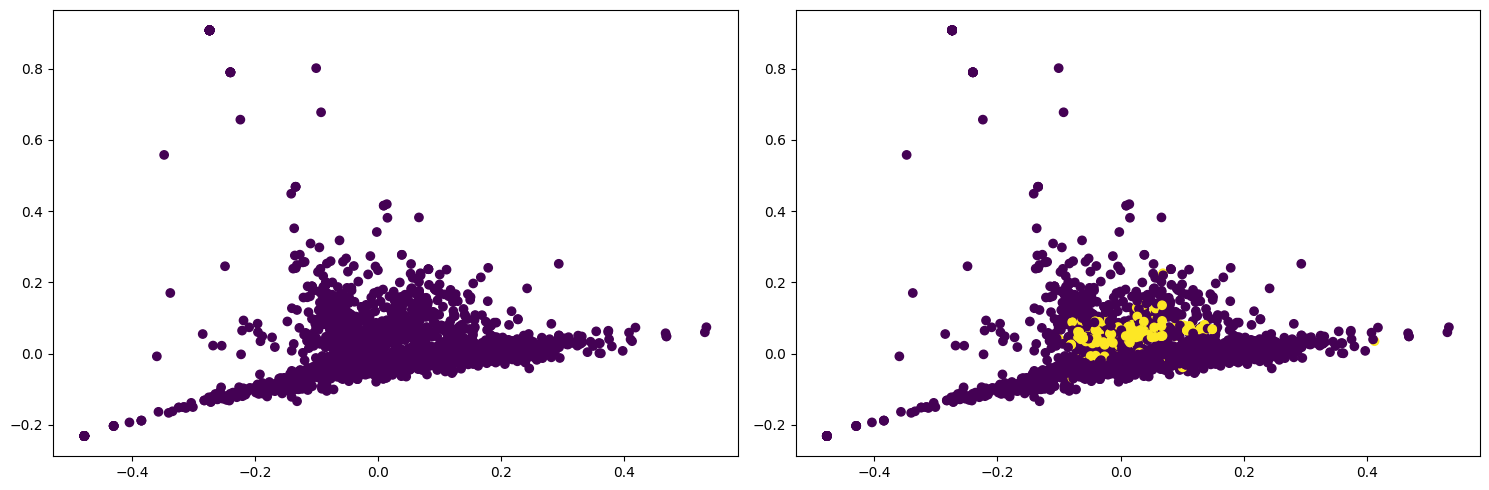

In [46]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=c)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df['spam'].to_numpy())


In [49]:
pca = PCA(n_components=3)
x3 = pca.fit_transform(np.array(tfidf.todense()), df['spam'])


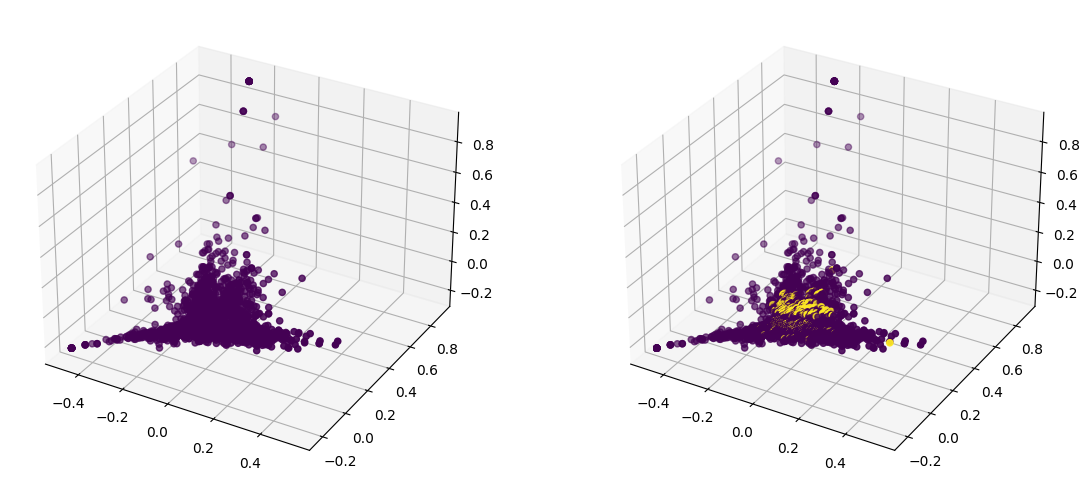

In [50]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=c)
ax = fig.add_subplot(gs[0, 1], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=df['spam'].to_numpy())
